<a href="https://colab.research.google.com/github/Sashka1101/TFG_Gender_Bias/blob/main/CasoHombres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas

In [2]:
pip install nltk

In [3]:
pip install gensim

In [4]:
pip install wordcloud

In [8]:
pip install matplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.2 MB/s eta 0:00:00
  Created wheel for SimpleWebSocketServer: filename=SimpleWebSocketServer-0.1.2-py3-none-any.whl size=9664 sha256=3048bcba7af4f67a9928b651a49c687900869d9ac6608942113db28d765f6853
  Stored in directory: /root/.cache/pip/wheels/af/cb/9d/23ef01c9c26b978be6d29ed456d7348abd0e96b1563049bd63
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=a914cb94178e2b74231b8f96f69a1901f51dba2554c584276415020195529292
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
  Created whe

In [5]:
pip install --upgrade google-api-python-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 43.9 MB/s eta 0:00:00
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.84.0
    Uninstalling google-api-python-client-2.84.0:
      Successfully uninstalled google-api-python-client-2.84.0


In [9]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [6]:
pip install deep-translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.6 MB/s eta 0:00:00


In [11]:
import pandas as pd
import re
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import multiprocessing
import nltk
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from deep_translator import LingueeTranslator
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'str'>
['universidad', 'investigación', 'premio', 'profesor', 'madrid', 'científico', 'miembro', 'ciencias', 'nacional', 'científica', 'ciencia', 'instituto', 'año', 'divulgación', 'director', '2018', 'isbn', 'español', 'españa', 'investigador', 'años', 'física', 'doctor', 'departamento', 'química', 'ingeniería', 'sido', 'medicina', 'gobierno', 'sociedad', 'academia', 'estudios', 'además', 'española', 'carrera', 'real', 'grupo', '2017', 'climate', 'consejo', 'gran', 'labor', '2016', '2019', 'fundación', 'zorita', 'centro', 'formación', 'gonzález', 'hospital', 'tecnología', 'catedrático', 'mundo', 'parte', 'artículos', 'facultad', 'científicos', '2011', 'biología', 'recibió', 'tesis', 'internacional', 'premios', 'asociación', 'desarrollo', 'molecular', 'programa', 'estudio', 'académico', 'cataluña', 'científicas', 'publicaciones', 'reconocimientos', 'ingeniero', 'presidente', 'nuevo', 'revista', '2012', '2020', 'cantabria', 'complutense', '2009', 'nuclear', 'investigaciones', 'ed

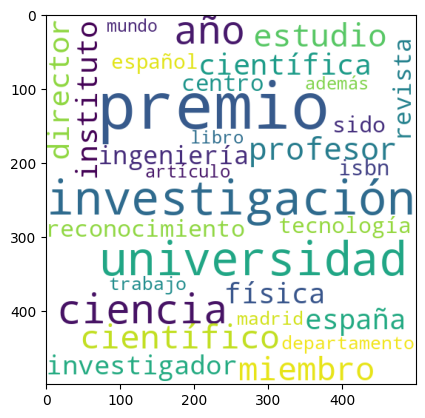

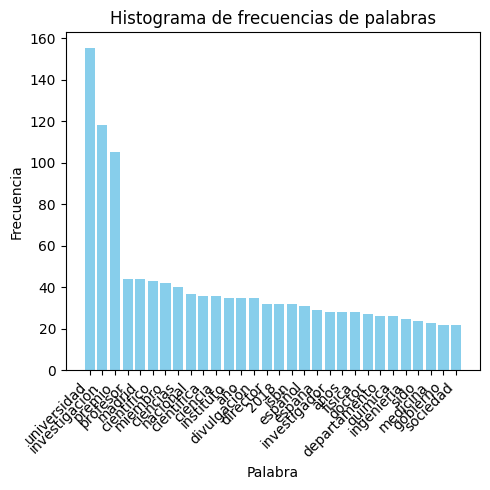

In [17]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('stopwords')


#Para la lematización? hará falta traducir a inglés, pero no he conseguido hacerlo...

csv_path = '../content/DatosTFG_hombre.csv'


df = pd.read_csv(csv_path)

def clean_data(text):
    text = re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿ/]+', '', text)
    text = re.sub(r'[\\/×\^\]\[÷]', '', text)
    return text
def change_lower(text):
    text = text.lower()
    return text

stopwords_list = stopwords.words("spanish")
def remover(text):
    text_tokens = text.split(" ")
    final_list = [word for word in text_tokens if not word in stopwords_list]
    text = ' '.join(final_list)
    return text

stopwords_list2 = stopwords.words("english")
def remover2(text):
    text_tokens = text.split(" ")
    final_list = [word for word in text_tokens if not word in stopwords_list2]
    text = ' '.join(final_list)
    return text

def get_w2vdf(df):
    w2v_df = pd.DataFrame(df['Biografía']).values.tolist()
    for i in range(len(w2v_df)):
        w2v_df[i] = w2v_df[i][0].split(" ")
    return w2v_df

def train_w2v(w2v_df):
    cores = multiprocessing.cpu_count()
    w2v_model = Word2Vec(min_count=4,
                         window=4,
                         alpha=0.03,
                         min_alpha=0.0007,
                         sg = 1,
                         workers=cores-1)

    w2v_model.build_vocab(w2v_df, progress_per=10000)
    w2v_model.train(w2v_df, total_examples=w2v_model.corpus_count, epochs=100, report_delay=1)
    return w2v_model


before = type(df.Biografía[0])

print(before)

df[['Biografía']] = df[['Biografía']].astype(str)
df['Biografía'] = df['Biografía'].apply(change_lower)
df['Biografía'] = df['Biografía'].apply(clean_data)
df['Biografía'] = df['Biografía'].apply(remover)
df['Biografía'] = df['Biografía'].apply(remover2)

w2v_df = get_w2vdf(df)
w2v_model = train_w2v(w2v_df)

w2v_model.wv.most_similar(positive=["universidad"])


text = ' '.join(df['Biografía'])

wc = WordCloud(
    max_words = 30,
    stopwords = stopwords_list,
    width = 500,
    height = 500,
    margin = 0,
    background_color = 'white'
).generate(text)

plt.imshow(wc)


def contar_frecuencia(text):
    # Dividir el texto en palabras
    palabras = text.split()

    # Crear un diccionario para almacenar la frecuencia de cada palabra
    frecuencia = {}

    # Iterar sobre cada palabra en el texto
    for palabra in palabras:
        # Si la palabra ya está en el diccionario, aumentar su frecuencia en 1
        if palabra in frecuencia:
            frecuencia[palabra] += 1
        # Si la palabra no está en el diccionario, inicializar su frecuencia en 1
        else:
            frecuencia[palabra] = 1

    return frecuencia


def ordenar_por_frecuencia(text):
    # Obtener la frecuencia de cada palabra
    frecuencia_palabras = contar_frecuencia(text)

    # Ordenar las palabras por frecuencia (de mayor a menor)
    palabras_ordenadas = sorted(frecuencia_palabras, key=lambda palabra: frecuencia_palabras[palabra], reverse=True)

    return palabras_ordenadas

# Ejemplo de uso
palabras_ordenadas = ordenar_por_frecuencia(text)
frecuencia_palabras = contar_frecuencia(text)
print(palabras_ordenadas)
print(frecuencia_palabras)

def dibujar_histograma(text):
    # Obtener la frecuencia de cada palabra
    frecuencia_palabras = contar_frecuencia(text)

    # Ordenar las palabras por frecuencia (de mayor a menor)
    palabras_ordenadas = sorted(frecuencia_palabras, key=lambda palabra: frecuencia_palabras[palabra], reverse=True)

    # Tomar solo las primeras 30 palabras
    palabras_30 = palabras_ordenadas[:30]

    # Obtener las frecuencias y las palabras para el gráfico
    frecuencias = [frecuencia_palabras[palabra] for palabra in palabras_30]
    palabras = palabras_30

    # Crear el gráfico de barras
    plt.figure(figsize=(5, 5))
    plt.bar(palabras, frecuencias, color='skyblue')

    # Añadir etiquetas y título
    plt.xlabel('Palabra')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de frecuencias de palabras')

    # Rotar las etiquetas del eje x para que sean legibles
    plt.xticks(rotation=45, ha='right')

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

dibujar_histograma(text)

